In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
# Load the Coca-Cola stock data
ticker = 'KO'
data = yf.download(ticker, start='2015-01-01', end='2023-12-31')
data.reset_index(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [3]:
# Data Exploration
print("Data Overview:")
print(data.head())
print("\nData Info:")
print(data.info())
print("\nData Shape:")
print(data.shape)

Data Overview:
Price        Date      Close       High        Low       Open    Volume
Ticker                    KO         KO         KO         KO        KO
0      2015-01-02  30.662115  30.851299  30.414723  30.749429   9921100
1      2015-01-05  30.662115  31.266045  30.618459  31.062308  26292600
2      2015-01-06  30.894947  31.244207  30.734871  30.858566  16897500
3      2015-01-07  31.280600  31.367914  30.982273  31.142349  13412300
4      2015-01-08  31.658958  31.702617  31.360632  31.418844  21743600

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2264 entries, 0 to 2263
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   (Date, )      2264 non-null   datetime64[ns]
 1   (Close, KO)   2264 non-null   float64       
 2   (High, KO)    2264 non-null   float64       
 3   (Low, KO)     2264 non-null   float64       
 4   (Open, KO)    2264 non-null   float64       
 5   (Volume,

In [4]:
# Handle missing values
data.fillna(method='ffill', inplace=True)
data.fillna(0, inplace=True)

/var/folders/s3/cvr5v5fn2lj0g39xwwzgpx_m0000gn/T/ipykernel_5209/146871787.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [5]:
# Add Moving Averages and Volatility
data['MA_20'] = data['Close'].rolling(window=20).mean()
data['MA_50'] = data['Close'].rolling(window=50).mean()
data['Daily_Return'] = data['Close'].pct_change()
data['Volatility'] = data['Daily_Return'].rolling(window=20).std()
data.dropna(inplace=True)

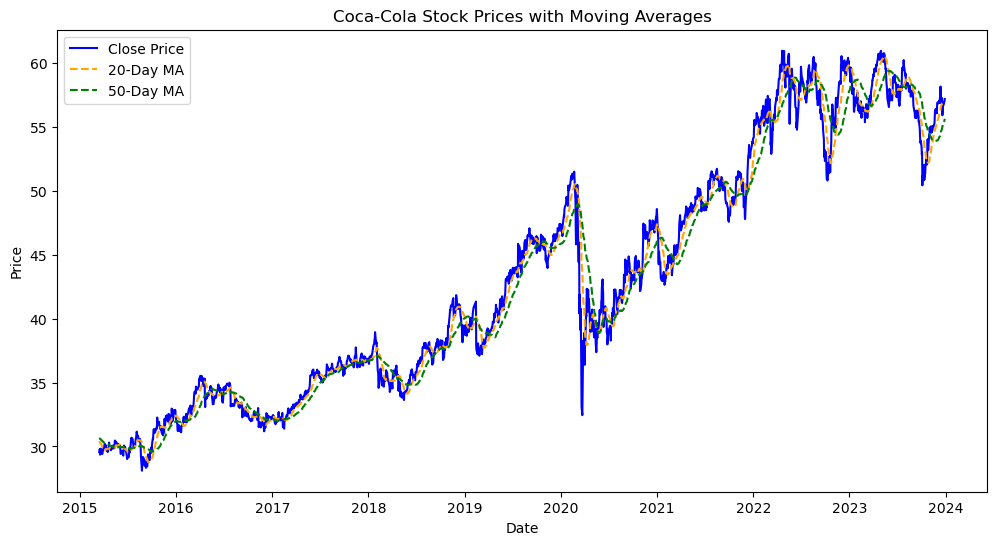

In [6]:
# Visualizations
# Stock Price with Moving Averages
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Close Price', color='blue')
plt.plot(data['Date'], data['MA_20'], label='20-Day MA', linestyle='--', color='orange')
plt.plot(data['Date'], data['MA_50'], label='50-Day MA', linestyle='--', color='green')
plt.title('Coca-Cola Stock Prices with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

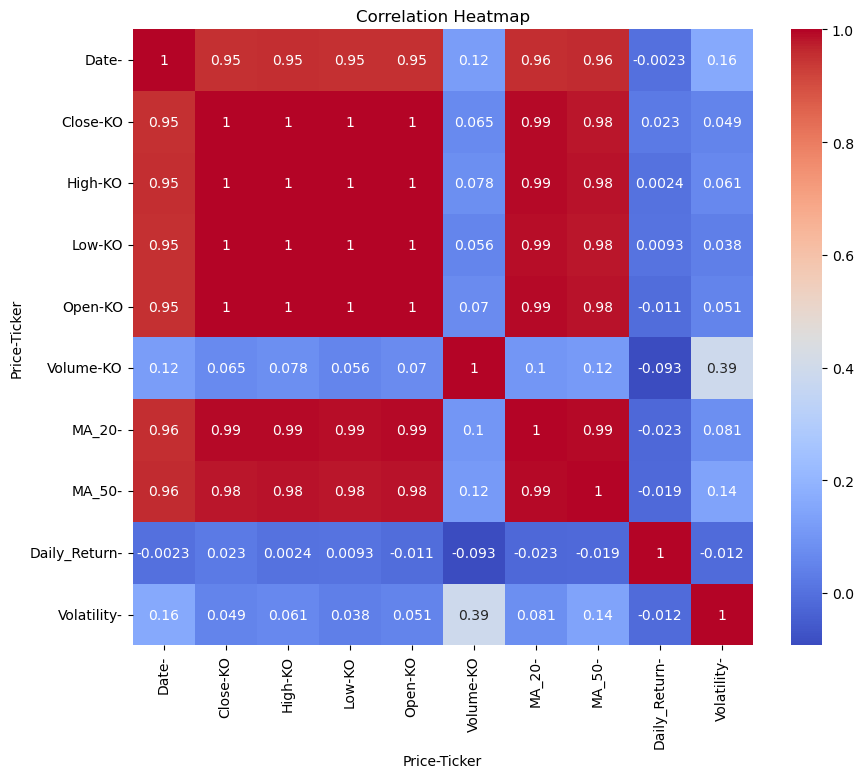

In [7]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

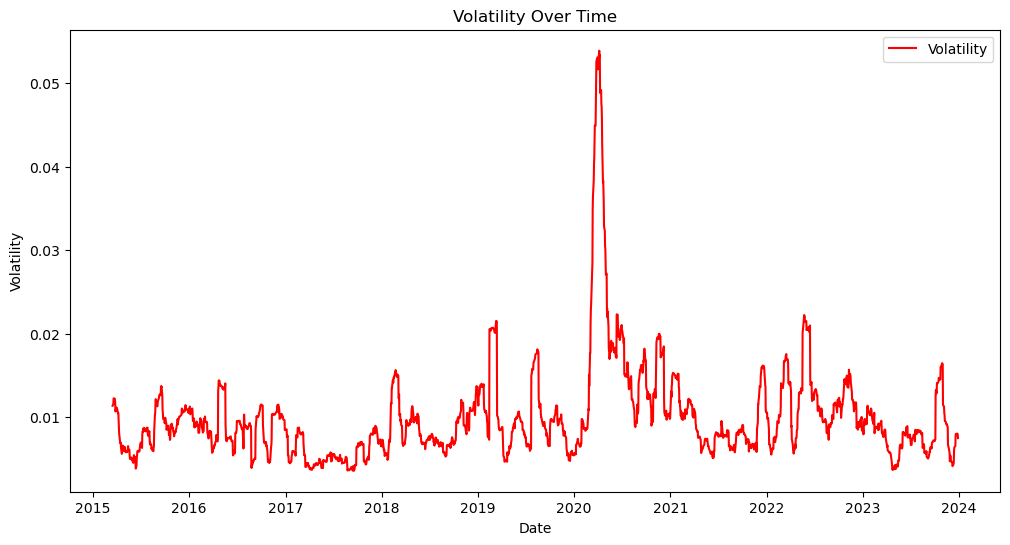

In [8]:
# Volatility Over Time
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Volatility'], color='red', label='Volatility')
plt.title('Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

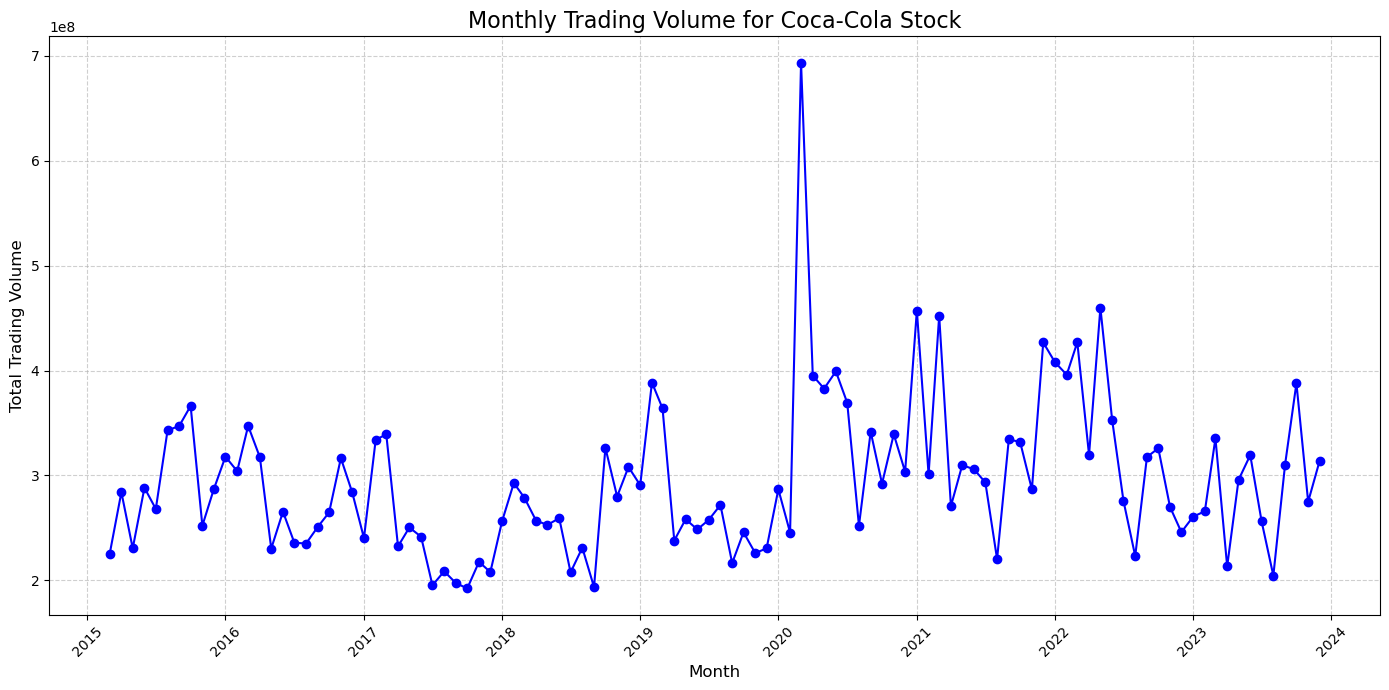

In [9]:
# Trading Volume Analysis
data['YearMonth'] = data['Date'].dt.to_period('M')
monthly_volume = data.groupby('YearMonth')['Volume'].sum().reset_index()
monthly_volume['YearMonth'] = monthly_volume['YearMonth'].dt.to_timestamp()

plt.figure(figsize=(14, 7))
plt.plot(monthly_volume['YearMonth'], monthly_volume['Volume'], marker='o', linestyle='-', color='blue')
plt.title('Monthly Trading Volume for Coca-Cola Stock', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Trading Volume', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
# Trading Behavior Analysis
data['DayOfWeek'] = data['Date'].dt.day_name()
weekend_days = ['Saturday', 'Sunday']
data['IsWeekend'] = data['DayOfWeek'].isin(weekend_days)

trading_behavior = data.groupby('IsWeekend').agg(
    total_volume=('Volume', 'sum'),
    total_trades=('Volume', 'count')
).reset_index()
trading_behavior['IsWeekend'] = trading_behavior['IsWeekend'].map({True: 'Weekend', False: 'Weekday'})

plt.figure(figsize=(10, 6))
sns.barplot(x='IsWeekend', y='total_volume', data=trading_behavior, palette='Set2')
plt.title('Total Trading Volume: Weekend vs. Weekday')
plt.xlabel('Day Type')
plt.ylabel('Total Trading Volume')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

KeyError: "Column(s) ['Volume'] do not exist"

In [11]:
# Export Data
data.to_csv('cleaned_coca_cola_stock.csv', index=False)